# HW07

** 다른 분들꺼 참고해서 풀었습니다. 

최재필

https://nbviewer.org/github/jaepil-choi/fbaquant23/blob/master/c1.1fe/hw/c1.1fe_hw07.ipynb

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm import tqdm

In [2]:
from scipy.stats import norm

In [3]:
np.random.seed(123)

In [4]:
BASE_PATH = Path('.').resolve().parents[0]
BASE_PATH

WindowsPath('E:/VSCodeProjects/fbaquant23/c1.1fe')

In [5]:
# data_path = Path(__file__).resolve() / 'data' # Interactive shell에선 안된다. 
data_path = Path('.').resolve() / 'data'
data_path

WindowsPath('E:/VSCodeProjects/fbaquant23/c1.1fe/hw/data')

In [6]:
# coursera_data_path = BASE_PATH / 'coursera' / 'Introduction to Portfolio Construction and Analysis with Python' / 'data'
# coursera_data_path

## Problem 1

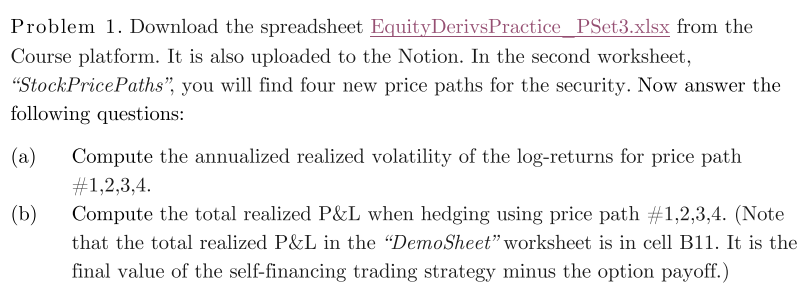

In [7]:
deriv = pd.read_excel(data_path / 'EquityDerivsPractice_PSet3.xlsx', sheet_name='StockPricePaths', index_col=0)
deriv.columns = ['path1', 'path2', 'path3', 'path4']
deriv.head()

,path1,path2,path3,path4
Period,,,,
0,50.000000,50.000000,50.000000,50.000000
1,49.672466,49.177203,48.669910,47.640628
2,49.625614,49.818076,46.169337,49.449656
3,49.743893,51.179055,47.481015,49.372705
4,50.215642,50.332767,49.034295,49.947589


### (a)

In [8]:
DAYS = 200

In [9]:
log_return = np.log(deriv / deriv.shift(1))

annualized_return = log_return.mean() * DAYS
annualized_vol = log_return.std() * np.sqrt(DAYS)


In [10]:
annualized_return

path1   -0.145909
path2    0.348794
path3    0.989746
path4   -0.603380
dtype: float64

In [11]:
annualized_vol

path1    0.254211
path2    0.303594
path3    0.515689
path4    0.401396
dtype: float64

### (b)

In [12]:
T = 0.25 # Expiration
sigma = 0.3 # Implied Volatility 
K = 50 # Strike
S0 = 50 # Initial Stock Price
r = 0.02 # risk-free rate

num_of_options = 100,000
num_of_hedging_periods = 50

hedging_period = T / num_of_hedging_periods

In [13]:
# price_path1 = deriv['path1']

# ...

## Problem 2

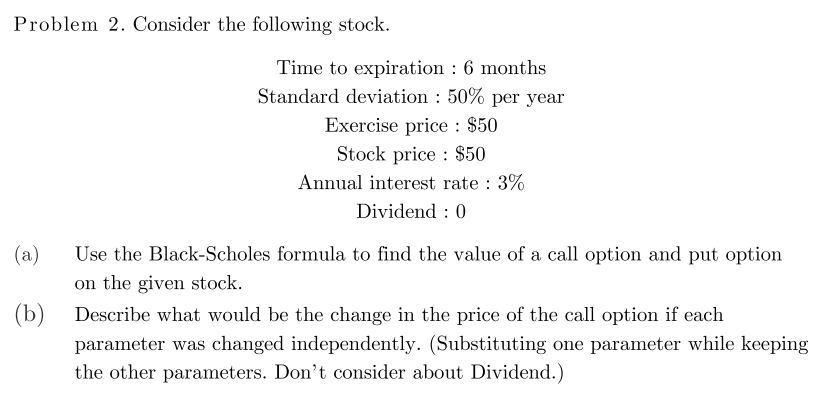

In [14]:
def BSM(S0, K, r, sigma, T, option_type='call'):
    d1 = (np.log(S0 / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    else:
        raise ValueError('option_type must be call or put')

In [15]:
T = 0.5
sigma = 0.5
K = 50
S0 = 50
r = 0.03

d = 0 # dividend

### (a)

In [16]:
BSM(S0, K, r, sigma, T, option_type='call')

7.3419869851043735

In [17]:
BSM(S0, K, r, sigma, T, option_type='put')

6.597583965257499

### (b)

In [18]:
# 현재가격이 오를 때 
S_arr = np.arange(1, 100)

call = [BSM(s, K, r, sigma, T, option_type='call') for s in S_arr]
put = [BSM(s, K, r, sigma, T, option_type='put') for s in S_arr]

<Axes: >

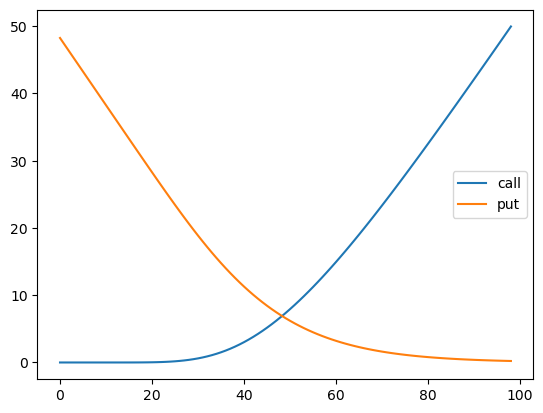

In [19]:
sns.lineplot(call, label='call')
sns.lineplot(put, label='put')

In [20]:
# 행사가격이 오를 때 
K_arr = np.arange(1, 100)

call = [BSM(S0, k, r, sigma, T, option_type='call') for k in K_arr]
put = [BSM(S0, k, r, sigma, T, option_type='put') for k in K_arr]

<Axes: >

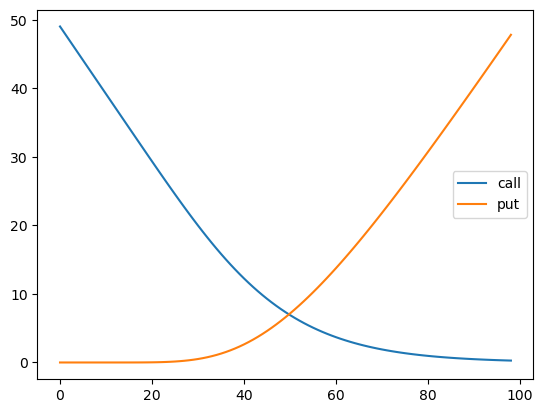

In [21]:
sns.lineplot(call, label='call')
sns.lineplot(put, label='put')

In [22]:
# 잔존만기가 길어질 때

T_arr = np.arange(0.1, 1, 0.1)

call = [BSM(S0, K, r, sigma, t, option_type='call') for t in T_arr]
put = [BSM(S0, K, r, sigma, t, option_type='put') for t in T_arr]

<Axes: >

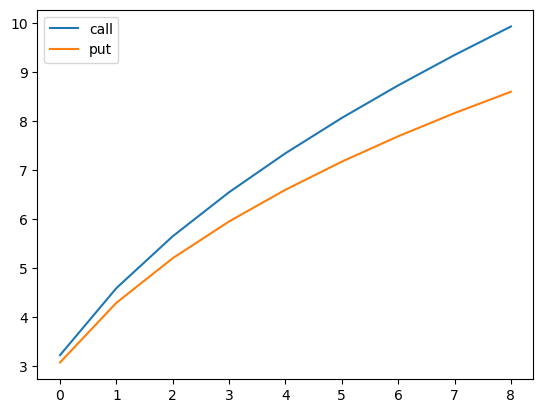

In [23]:
sns.lineplot(call, label='call')
sns.lineplot(put, label='put')

In [24]:
# 변동성이 커질 때

sigma_arr = np.arange(0.1, 10, 0.1)

call = [BSM(S0, K, r, sig, T, option_type='call') for sig in sigma_arr]
put = [BSM(S0, K, r, sig, T, option_type='put') for sig in sigma_arr]

<Axes: >

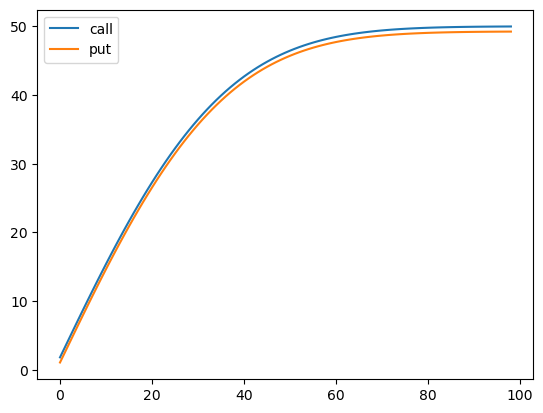

In [25]:
sns.lineplot(call, label='call')
sns.lineplot(put, label='put')

## Problem 3

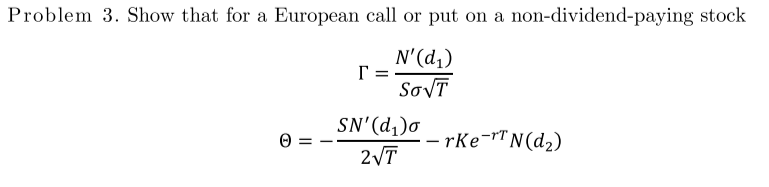

## Problem 4

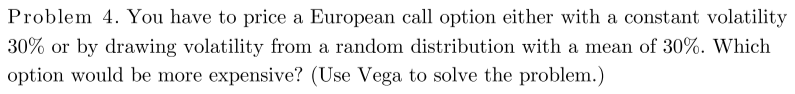

## Problem 5

https://github.com/fbaquant/leetcode-challenge/issues/12

## Problem 6

https://github.com/fbaquant/leetcode-challenge/issues/13